# IT salaries project

### This is a project which is a test case for my data science jurney.
<b> Created by Dezső Szabolcs </b>

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Importing the packages from my Python library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the external CSV file and document it

In [4]:
salaries_df = pd.read_csv("data/ds_salaries.csv")

**Replacing the dataset index**

In [10]:
salaries_df.index.names = ['ID']

In [5]:
salaries_df = salaries_df.drop('Unnamed: 0', axis = 1)


In [12]:
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
ID,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


**Attributes of the dataset:**
- ID
- Work Year
- Experience level
- Employment Type
- Job Title
- Salary
- Salary Currency
- Salary in USD
- Employee Residence
- Remote Ratio
- Company Location
- Company Size

### Some basic statistics about the data

In [13]:
salaries_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [25]:
salaries_df.shape

(607, 11)

### Cleaning the data if there is some NaN or NULL value

In [26]:
pd.isna(salaries_df).sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [33]:
salaries_df.dropna(inplace = True)

## Visualization
![separator1](https://i.imgur.com/ZUWYTii.png)

**Making a chart which represents the salaries of the three main field of data jobs**

Slice the main DataFrame into three separate DataFrame

In [6]:
data_scientists = salaries_df[salaries_df["job_title"].str.contains("Data Scientist")]
data_analysts = salaries_df[salaries_df["job_title"].str.contains("Data Analyst")]
data_engineers = salaries_df[salaries_df["job_title"].str.contains("Data Engineer")].copy()

Filter the Big Data Engineers from the Data Engineers DataFrame

In [15]:
data_engineers[data_engineers['job_title'].str.contains('Big') == True]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
ID,,,,,,,,,,,
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
17,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S
31,2020,EN,FT,Big Data Engineer,70000,USD,70000,US,100,US,L
120,2021,MI,FT,Big Data Engineer,60000,USD,60000,ES,50,RO,M
180,2021,MI,FT,Big Data Engineer,1672000,INR,22611,IN,0,IN,L
192,2021,MI,FT,Big Data Engineer,18000,USD,18000,MD,0,MD,S
213,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L
230,2021,EN,FT,Big Data Engineer,1200000,INR,16228,IN,100,IN,L


In [17]:
drop_index = (data_engineers[data_engineers['job_title'].str.contains('Big') == True]).index

In [18]:
data_engineers.drop(index = drop_index, inplace = True)

The edited DataFrame with only the "original" Data Engineers data

In [19]:
data_engineers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
ID,,,,,,,,,,,
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S
16,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
19,2020,MI,FT,Lead Data Engineer,56000,USD,56000,PT,100,US,M
22,2020,SE,FT,Data Engineer,42000,EUR,47899,GR,50,GR,L
27,2020,SE,FT,Data Engineer,720000,MXN,33511,MX,0,MX,S
...,...,...,...,...,...,...,...,...,...,...,...
579,2022,SE,FT,Data Engineer,25000,USD,25000,US,100,US,M
582,2022,SE,FT,Data Engineer,220110,USD,220110,US,100,US,M
583,2022,SE,FT,Data Engineer,160080,USD,160080,US,100,US,M


The unique job titles in every DataFrame that I created earlier

In [20]:
data_engineers['job_title'].unique()

array(['Lead Data Engineer', 'Data Engineer', 'Data Engineering Manager',
       'Cloud Data Engineer', 'Director of Data Engineering',
       'Principal Data Engineer'], dtype=object)

In [103]:
data_scientists['job_title'].unique()

array(['Data Scientist', 'Lead Data Scientist',
       'Principal Data Scientist', 'Applied Data Scientist',
       'Staff Data Scientist'], dtype=object)

In [104]:
data_analysts['job_title'].unique()

array(['Product Data Analyst', 'Data Analyst', 'Business Data Analyst',
       'Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst',
       'Financial Data Analyst', 'Finance Data Analyst',
       'Principal Data Analyst'], dtype=object)

Calculating the average salaries in each field

In [21]:
data_engineer_avg_salary = data_engineers['salary'].mean()

In [22]:
data_scientist_avg_salary = data_scientists['salary'].mean()

In [23]:
data_analysts_avg_salary = data_analysts['salary'].mean()

In [24]:
data_engineer_avg_salary

177628.61333333334

In [25]:
data_scientist_avg_salary

493161.320754717

In [26]:
data_analysts_avg_salary

215545.82352941178

Creating a bar chart with the calculated average salaries

In [27]:
bar_salary_names_avg = ["Data Analyst", "Data Engineer", "Data Scientist"]

In [31]:
bar_salary_avg = [data_analysts_avg_salary, data_engineer_avg_salary, data_scientist_avg_salary]

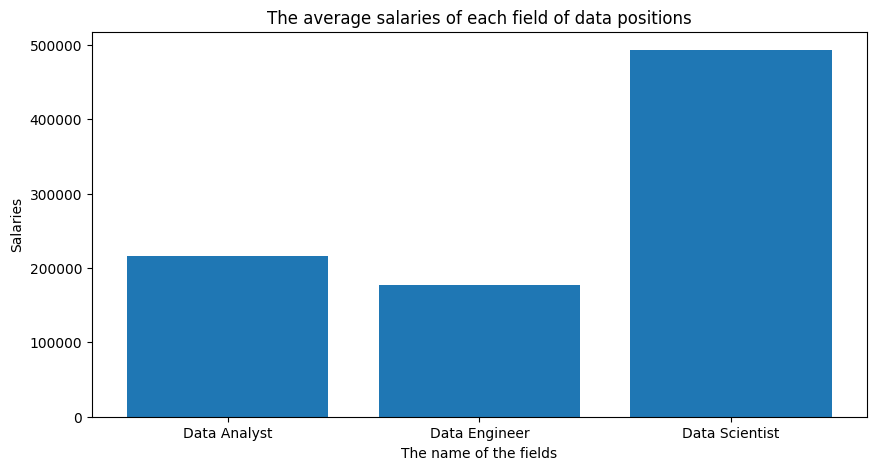

In [37]:
fig = plt.figure(figsize = (10, 5))
plt.bar(bar_salary_names_avg, bar_salary_avg)
plt.xlabel('The name of the fields')
plt.ylabel('Salaries')

plt.title('The average salaries of each field of data positions')
plt.show()

**Making a chart which represents the relationship between the remote ratio and the salaries**

In [44]:
null_remote = salaries_df[salaries_df['remote_ratio'] == 0]
half_remote = salaries_df[salaries_df['remote_ratio'] == 50]
full_remote = salaries_df[salaries_df['remote_ratio'] == 100]

In [48]:
null_remote['salary_in_usd'].mean()

106354.62204724409

In [47]:
half_remote['salary_in_usd'].mean()

80823.0303030303

In [46]:
full_remote['salary_in_usd'].mean()

122457.45406824147

In [65]:
pie_chart_salaries = [null_remote['salary_in_usd'].mean(), half_remote['salary_in_usd'].mean(), full_remote['salary_in_usd'].mean()]
pie_chart_labels = [0,50, 100]

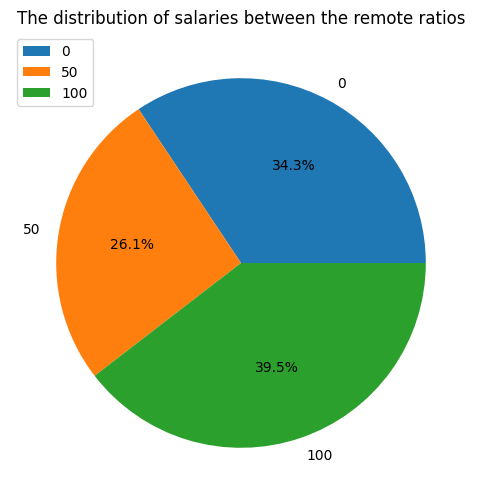

In [69]:
fig = plt.figure(figsize = (12, 6))

plt.pie(pie_chart_salaries, labels = pie_chart_labels, autopct='%1.1f%%')
plt.legend(pie_chart_labels)
plt.title("The distribution of salaries between the remote ratios")

plt.show()

**Making a chart which represents the specific Data Science job salaries**

First of all, display the unique job titles

In [72]:
specific_ds_job_titles = data_scientists['job_title'].unique()

In [73]:
specific_ds_job_titles

array(['Data Scientist', 'Lead Data Scientist',
       'Principal Data Scientist', 'Applied Data Scientist',
       'Staff Data Scientist'], dtype=object)

Moving the unique titles to a new array

In [94]:
i = 0

separated_ds_job_titles = []

while i != specific_ds_job_titles.size:
    separated_ds_job_titles.append(data_scientists[data_scientists['job_title']==specific_ds_job_titles[i]])
    
    i += 1

Collect the salaries for the plotting

In [133]:
bar_2d_salaries = []

for j in range (i):
    bar_2d_salaries.append(separated_ds_job_titles[j]['salary_in_usd'].mean())

In [134]:
bar_2d_salaries

[108187.83216783217, 115190.0, 215242.42857142858, 175655.0, 105000.0]

In [146]:
specific_ds_job_titles

array(['Data Scientist', 'Lead Data Scientist',
       'Principal Data Scientist', 'Applied Data Scientist',
       'Staff Data Scientist'], dtype=object)

<BarContainer object of 5 artists>

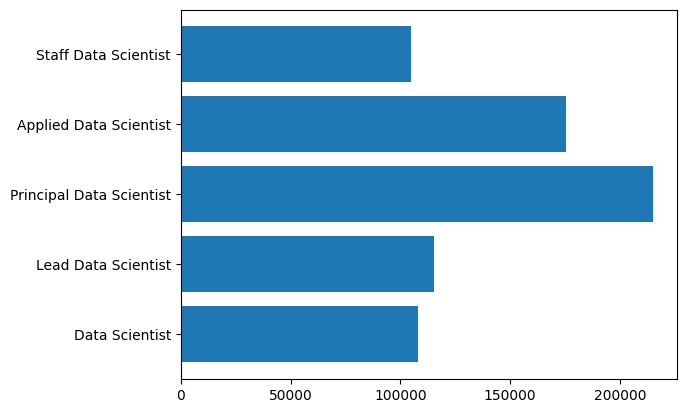

In [149]:
plt.barh(specific_ds_job_titles, bar_2d_salaries)

**Making a chart which represents the relationship between the years and the salaries**

In [7]:
data_scientists

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
...,...,...,...,...,...,...,...,...,...,...,...
592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
593,2022,SE,FT,Data Scientist,150000,USD,150000,US,100,US,M
596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M


In [11]:
years = [2020,2021,2022]

In [12]:
years

[2020, 2021, 2022]

In [34]:
avg_salary_by_year = []
separte_work_year = []

for i in years:
    separte_work_year.append(data_scientists[data_scientists['work_year'] == i])

separte_work_year

#for i in years:
    #avg_salary_by_year.append(data_scientists[data_scientists['work_year'] == i]['salary_in_usd'].mean)

[    work_year experience_level employment_type                 job_title  \
 0        2020               MI              FT            Data Scientist   
 6        2020               SE              FT       Lead Data Scientist   
 7        2020               MI              FT            Data Scientist   
 10       2020               EN              FT            Data Scientist   
 11       2020               MI              FT            Data Scientist   
 12       2020               EN              FT            Data Scientist   
 24       2020               MI              FT       Lead Data Scientist   
 32       2020               SE              FT            Data Scientist   
 40       2020               MI              FT            Data Scientist   
 46       2020               MI              FT            Data Scientist   
 48       2020               MI              FT            Data Scientist   
 55       2020               SE              FT  Principal Data Scientist   

In [27]:
avg_salary_by_year

[<bound method NDFrame._add_numeric_operations.<locals>.mean of 0      79833
 6     190000
 7      35735
 10     51321
 11     40481
 12     39916
 24    115000
 32     68428
 40     45760
 46     76958
 48    105000
 55    148261
 56     38776
 57    118000
 58    120000
 59    138350
 62     21669
 63    412000
 65     62726
 66     49268
 68    105000
 69     91237
 70     62726
 71     42197
 Name: salary_in_usd, dtype: int64>,
 <bound method NDFrame._add_numeric_operations.<locals>.mean of 75      53192
 82      54238
 94      29751
 104     73000
 116     50000
 123    110037
 125    151000
 127      9466
 129     40570
 131     49646
 134    100000
 138    220000
 139     80000
 143     82500
 151    150000
 152     75774
 153     13400
 156    119059
 173    235000
 176      2859
 177     40038
 179      5679
 181     90734
 195    147000
 200     61467
 202     37825
 204    160000
 205     12901
 217     90734
 221    116914
 222     33808
 223     56256
 225    416000
 226  